In [1]:
%matplotlib inline
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from tools.backtesting import Market, Trader
from tools import open_file, product_info, dataframe

In [2]:
from tools.backtesting import Market, Trader

### 0. 데이터 전처리

In [3]:
rawdata = open_file('h5py', 'custom/ohlct(20)_sr.h5', mode='r')

In [4]:
def signal(datatable):
    sigup = np.where(datatable.trend > 0.7, 1, 0)
    sigdown = np.where(datatable.trend < -0.7, 1, 0)
    
    arr = np.split(sigup, np.where(np.diff(sigup) != 0)[0]+1)
    datatable['up'] = np.concatenate([x.cumsum() for x in arr])
    
    arr = np.split(sigdown, np.where(np.diff(sigdown) != 0)[0]+1)
    datatable['down'] = np.concatenate([x.cumsum() for x in arr])
    
    datatable['up'] = datatable['up'].shift()
    datatable['down'] = datatable['down'].shift()
    
    datatable['yes_bot'] = datatable['bottom'].shift()

In [5]:
market = Market(feed=rawdata, signal=signal)

 preprocessing data...(48)          
Done


In [6]:
def strat(trader, inst, metric, date):
    #if inst['sector'] == 'Currency':
    #    return
    #entrylong
    if (metric['up'] >= 3) and (metric['open'] > metric['yes_bot']):
        trade = trader.trades.get(inst, 'TFSR', Market.long)
        if not trade:
            entryprice = Market.get_price(inst, metric['open'], metric['high'], skid=0.25)
            position = Market.long
            stopprice = metric['yes_bot']
            if stopprice < entryprice:
                trader.buy(inst, 'TFSR', position, date, entryprice, stopprice)

In [7]:
def stop(trader, trade, metric):
    return metric['bottom'] if metric['bottom'] > trade['stopprice'] else trade['stopprice']


In [26]:
%%time
trader = Trader(market=market,
                principal=100000,
                portfolio_heat=0.5,
                sector_heat=0.5,
                heat=0.05,
                max_lot= 1,
                strategy=strat,
                stop=stop)
trader.run_trade(start='2005-03-25', end='2015-01-01')

 now trading at 2014-12-31 00:00:00         Wall time: 2min 35s


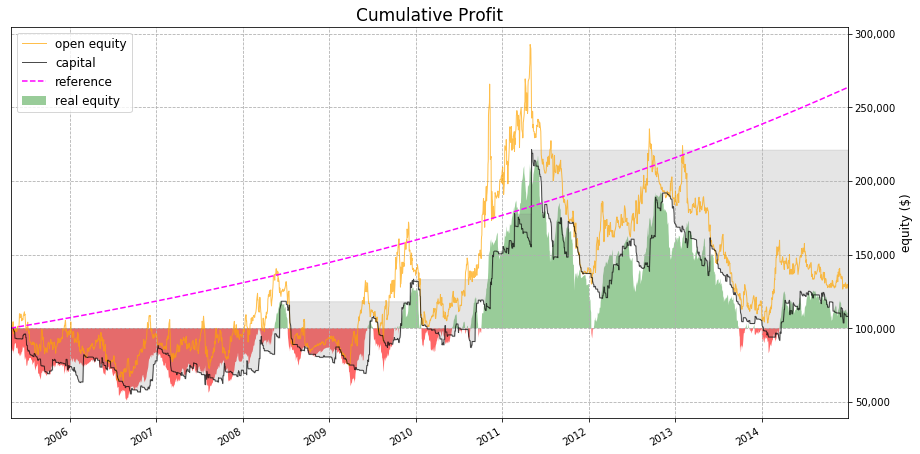

,투자금,최종자산,총손익,Bliss,ICAGR,MDD,손익비,승률,위험대비손익,평균수익,평균손실,손익표준편차,보유기간,# trades
Total,"100,000","111,026",11.03%,0.018,1.08%,58.55%,1.02,28.99%,3.19%,2611.56,-1048.76,"2,723",27 days,155.3


In [25]:
trader.summary(level=0)

In [19]:
trader.rejected

,#,name,date,real equity,risk,heat,sector risk,sector heat,port risk,port heat,strategy,type
0,0,British Pound,2005-04-25,20000.000,2906.25000,1000.0000,0.000,5000.000,0.000,10000.000,TFSR,1
1,1,Euro Bund,2005-04-25,20000.000,2240.00000,1000.0000,600.000,5000.000,0.000,10000.000,TFSR,1
2,1,Euro Bobl,2005-04-25,20000.000,1430.00000,1000.0000,600.000,5000.000,0.000,10000.000,TFSR,1
3,2,30Year U.S. T-Bond,2005-04-25,20000.000,3208.49000,1000.0000,1120.000,5000.000,0.000,10000.000,TFSR,1
4,2,5Year U.S. T-Note,2005-04-25,20000.000,1410.06605,1000.0000,1120.000,5000.000,0.000,10000.000,TFSR,1
5,2,10Year U.S. T-Note,2005-04-25,20000.000,2179.68700,1000.0000,1120.000,5000.000,0.000,10000.000,TFSR,1
6,3,British Pound,2005-04-26,18116.375,2562.50000,999.4750,0.000,4997.375,1873.125,9994.750,TFSR,1
7,3,Euro Bund,2005-04-26,18116.375,2330.00000,999.4750,-1873.125,4997.375,1873.125,9994.750,TFSR,1
8,3,Euro Bobl,2005-04-26,18116.375,1420.00000,999.4750,-1873.125,4997.375,1873.125,9994.750,TFSR,1
9,3,New Zealand Dollar,2005-04-26,18116.375,1820.00000,999.4750,0.000,4997.375,1873.125,9994.750,TFSR,1


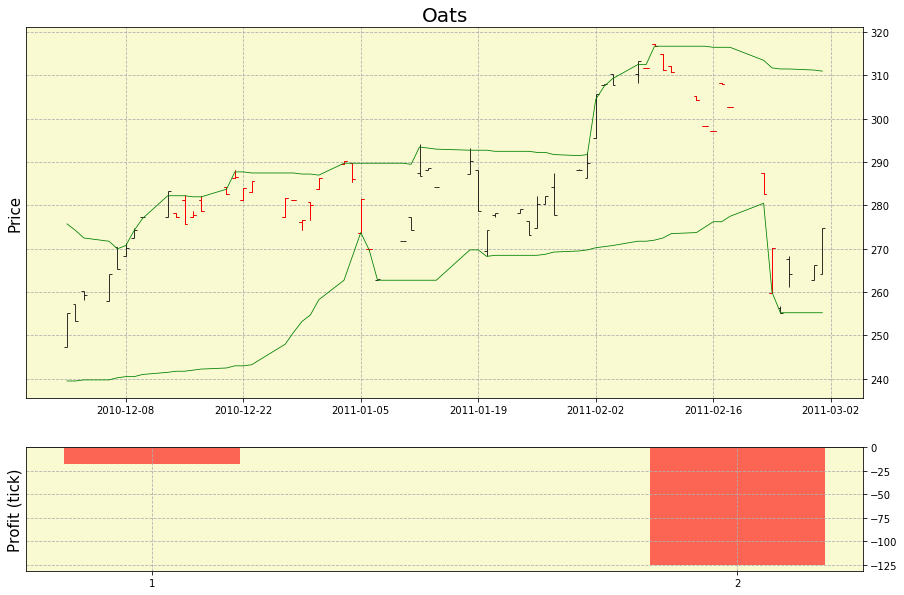

In [53]:
ax, data=trader.report('ZO', start='2010-12-01', end='2011-3-01')
#ax[0].plot(data[['top','bottom']].shift(), color='green');

In [55]:
x = trader.feed['AD'].index.values

In [15]:
trader.equitylog

,capital,open profit,equity,real equity,port risk,port heat,fee,#
date,,,,,,,,
2005-04-25,99968.500,-334.370,99634.130,86522.962,13445.538,99968.500,31.5,9
2005-04-26,99958.000,-1669.992,98288.008,81217.144,18740.856,99958.000,42.0,12
2005-04-27,99954.500,-1618.126,98336.374,81593.328,18361.172,99954.500,45.5,13
2005-04-28,99944.000,665.602,100609.602,77990.013,21953.987,99944.000,56.0,16
2005-04-29,99940.500,2063.118,102003.618,76904.010,23036.490,99940.500,59.5,17
2005-05-02,99940.500,263.739,100204.239,77636.196,22304.304,99940.500,59.5,17
2005-05-03,99937.000,-2025.628,97911.372,75112.694,24824.306,99937.000,63.0,18
2005-05-04,98095.000,3849.358,101944.358,75201.315,22893.685,98095.000,70.0,18
2005-05-05,98095.000,5576.841,103671.841,76261.935,21833.065,98095.000,70.0,18


In [12]:
 (x- x[0])

array([                 0,     86400000000000,    172800000000000, ...,
       305424000000000000, 305510400000000000, 305596800000000000], dtype='timedelta64[ns]')

In [64]:
refy = np.exp((x-x[0]).astype('timedelta64[]').astype('int'))

C:\Python\Miniconda64\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


In [65]:
(x-x[0]).astype('timedelta64[D]').astype('int')

array([   0,    1,    2, ..., 3535, 3536, 3537])

In [17]:
refx = (x-x[0])/np.timedelta64(365.25,'D')

ValueError: Could not convert object to NumPy timedelta

In [14]:
refx

array([  0.00000000e+00,   2.73972603e-03,   5.47945205e-03, ...,
         9.68493151e+00,   9.68767123e+00,   9.69041096e+00])

In [15]:
refy = np.exp(0.1*refx)

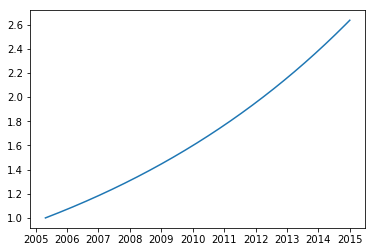

In [16]:
plt.plot(x, refy)